# **Importacion de paquetes**
---

In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Carga de datos**
---

In [3]:
data=pd.read_csv('../../seleccion_vars/coments/DatasetAirbnb_Review_Varselect_v1.csv')

In [5]:
data.head()

,imagen,user_id,apart_id,ubicacion,gender,rating,sentimiento,prom_long_word,num_adj,text_clean,tokens,prob_ruido,prob_limp,prob_ubi,prob_wf,prob_park,prob_bañ,num_toks
0,https://a0.muscache.com/im/pictures/user/e97d0...,-5345305016665044310,https://www.airbnb.es/rooms/46527977?adults=1&...,6,0.0,3.0,0.0,4.805970,10.0,absolutamente bien lugar camas duras lejos cen...,"['absolutamente', 'bien', 'lugar', 'camas', 'd...",0.0,1.0,0.0,0.0,0.0,0.0,62.0
1,https://a0.muscache.com/im/pictures/user/0c5a3...,7554217637905518485,https://www.airbnb.es/rooms/46527977?adults=1&...,8,1.0,4.0,0.0,4.666667,1.0,buenas gestión atención volveré usar casa,"['buenas', 'gestión', 'atención', 'volveré', '...",0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,https://a0.muscache.com/im/pictures/user/4df2c...,2753252670262692822,https://www.airbnb.es/rooms/46527977?adults=1&...,9,2.0,1.0,0.0,4.720000,7.0,empezar mundos corre cobren euros tener wifi p...,"['empezar', 'mundos', 'corre', 'cobren', 'euro...",0.0,0.0,0.0,1.0,0.0,0.0,35.0
3,https://a0.muscache.com/im/pictures/user/b8437...,5933799744255950932,https://www.airbnb.es/rooms/46527977?adults=1&...,6,0.0,5.0,0.0,5.236364,8.0,situado mejor zona benidorm vistas hermosa pla...,"['situado', 'mejor', 'zona', 'benidorm', 'vist...",0.0,0.0,0.0,0.0,0.0,0.0,28.0
4,https://a0.muscache.com/im/pictures/user/b8f5e...,3658483447196535546,https://www.airbnb.es/rooms/46527977?adults=1&...,6,0.0,5.0,0.0,5.222222,2.0,pasamos estancia agradable gustado,"['pasamos', 'estancia', 'agradable', 'gustado']",0.0,0.0,0.0,0.0,0.0,0.0,4.0


# **Agrupamos por usuario**
---

In [9]:
def moda(series):
    return series.mode().iloc[0] 

data_grouped=data.groupby('user_id').agg({
    'ubicacion':'median',
    'gender':moda,
    'rating':'median',
    'sentimiento':'median',
    'prom_long_word':'median',
    'num_adj':'median',
    'prob_ruido':moda,
    'prob_limp':moda,
    'prob_ubi':moda,
    'prob_wf':moda,
    'prob_park':moda,
    'prob_bañ':moda,
    'num_toks':'median'
}).reset_index()

# **Eliminamos outliers**
---

In [ ]:
# Calcula la media y la desviación estándar para cada columna numérica
means = data[['Evaluaciones','Precio','Capacidad']].mean()
stds = data[['Evaluaciones','Precio','Capacidad']].std()

# Elimina los outliers para cada columna numérica
for col in means.index:
    upper_bound = means[col] + 3 * stds[col]
    data = data[data[col] <= upper_bound]

# **KMEANS**
---

### **Método del codo**


Para k = 2 , el coste (SSE)= 2380900.343134435
Para k = 3 , el coste (SSE)= 1420325.615310151
Para k = 4 , el coste (SSE)= 1018435.0199909194
Para k = 5 , el coste (SSE)= 824187.644405705
Para k = 6 , el coste (SSE)= 664616.4678987882
Para k = 7 , el coste (SSE)= 583666.847087238
Para k = 8 , el coste (SSE)= 548663.0754013611
Para k = 9 , el coste (SSE)= 493955.5215188992
Para k = 10 , el coste (SSE)= 455182.3123372802


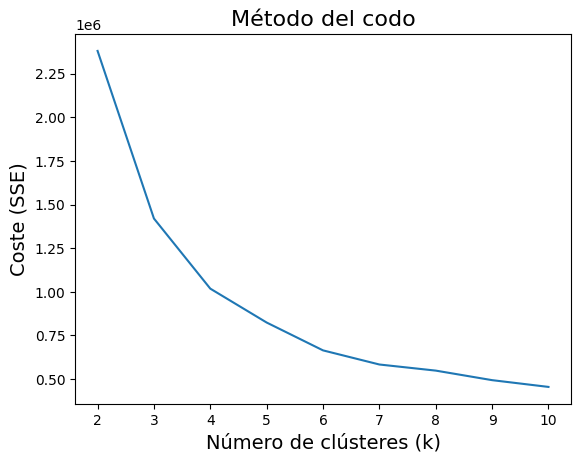

In [15]:
data_cluster=data_grouped.drop('user_id',axis=1)
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)
fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

### **Calinski**

Para k = 2 , CH = 21856.507818148562
Para k = 3 , CH = 23730.135104813828
Para k = 4 , CH = 24166.717996004638
Para k = 5 , CH = 23338.496739543974
Para k = 6 , CH = 23920.353842606128
Para k = 7 , CH = 23066.770852863916
Para k = 8 , CH = 21178.036591758922
Para k = 9 , CH = 20802.653630530913
Para k = 10 , CH = 20216.674950059514


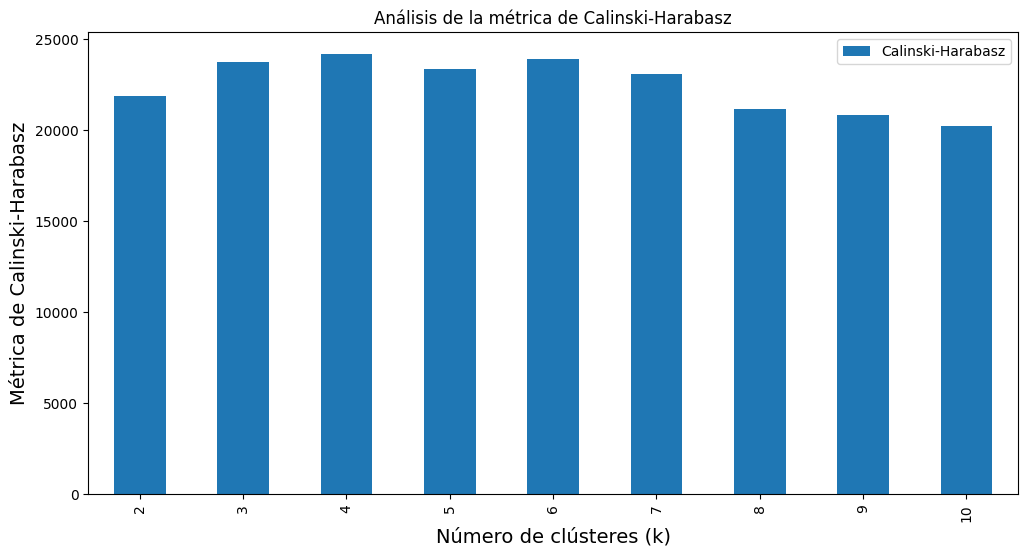

In [16]:
# definimos la n-tupla donde ordenaderemos las sucesivas métricas de Calinski-Harabasz.
# hallados para cada valor de k
Calinski = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para la medida del error de reconstrucción desde k= 2 hasta k= 10 que se
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100)
    Y_pred = kmeans.fit_predict(data_cluster)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(data_cluster, Y_pred),
    )
    Calinski.append(calinski_harabasz_score(data_cluster, Y_pred))

fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame({'n_clusters': krange,'Calinski-Harabasz': Calinski,}).set_index('n_clusters').plot(title='Análisis de la métrica de Calinski-Harabasz',
kind='bar',ax=ax)
ax.set_ylabel("Métrica de Calinski-Harabasz",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
plt.show()

### **Silueta**

In [17]:
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
range_n_clusters = [ 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_cluster, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

plt.show()

Para k = 3 , S = 0.5161419627437511
Para k = 4 , S = 0.4303207588440625
Para k = 5 , S = 0.3865605558488057
Para k = 6 , S = 0.35431332342215144
Para k = 7 , S = 0.2990663975460842
Para k = 8 , S = 0.25840284912720934


### **Clustering k=3 (Mejor según silueta)**


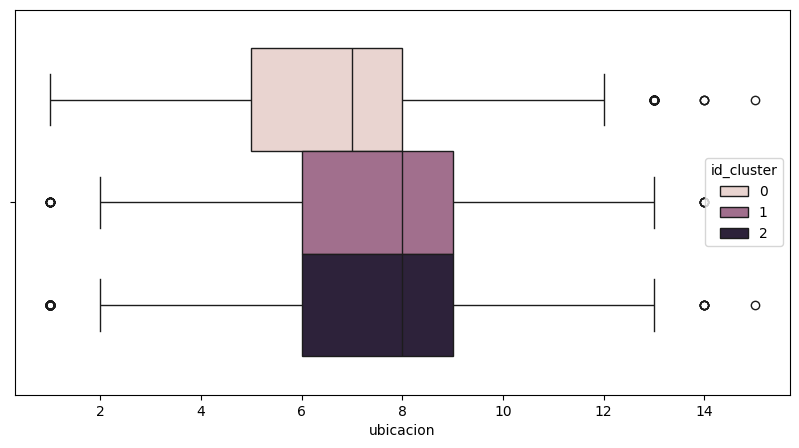

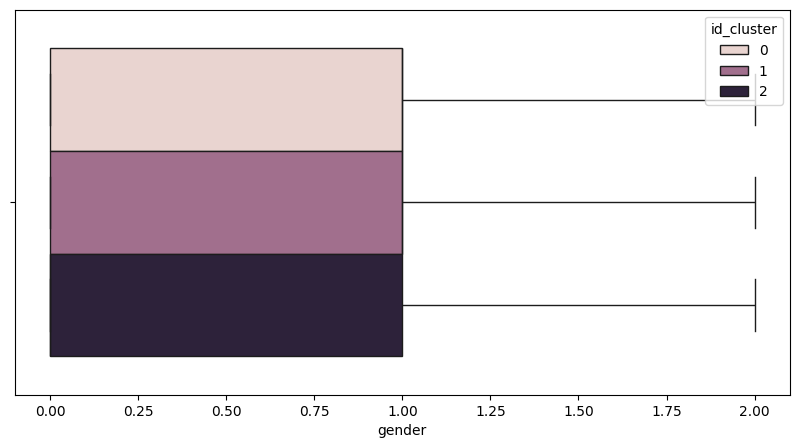

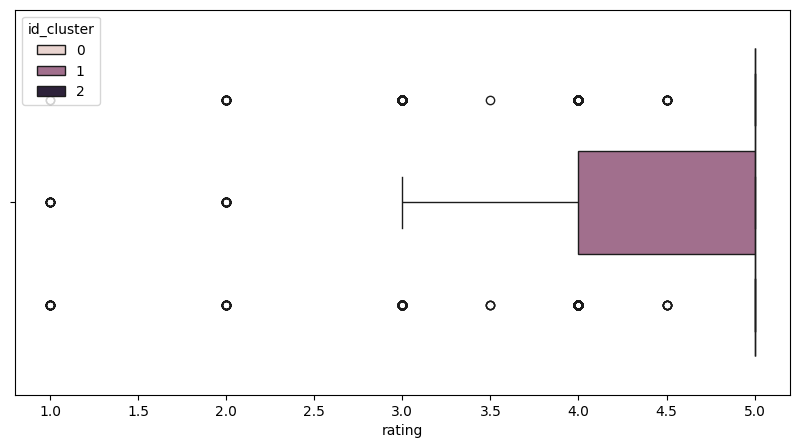

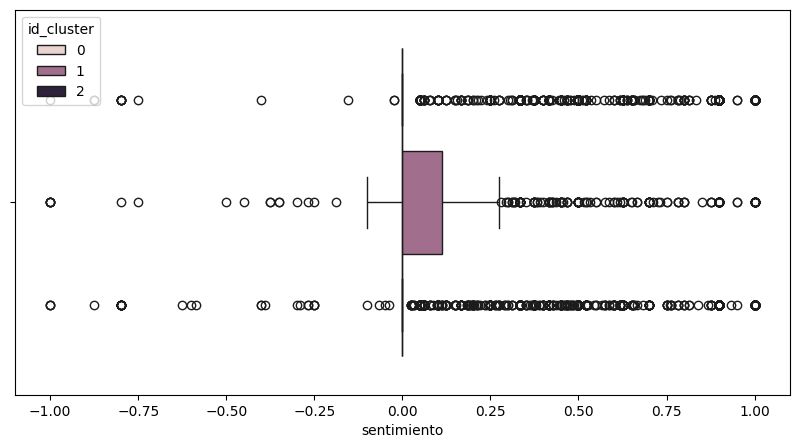

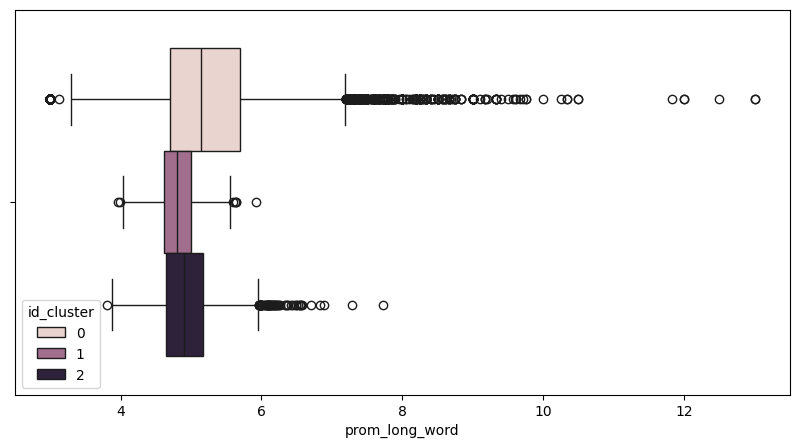

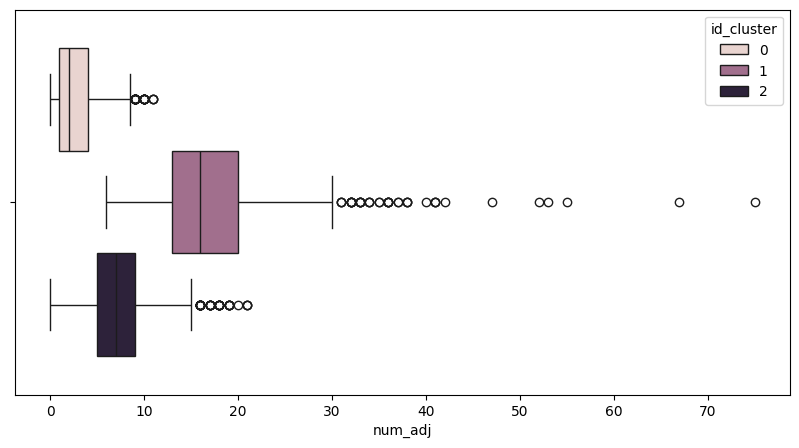

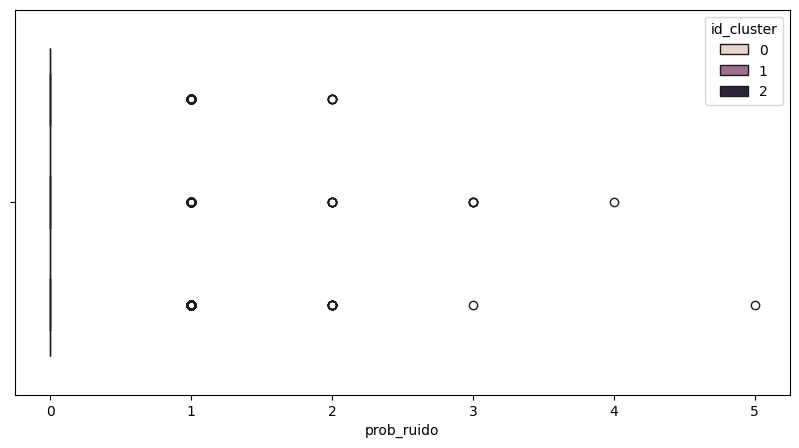

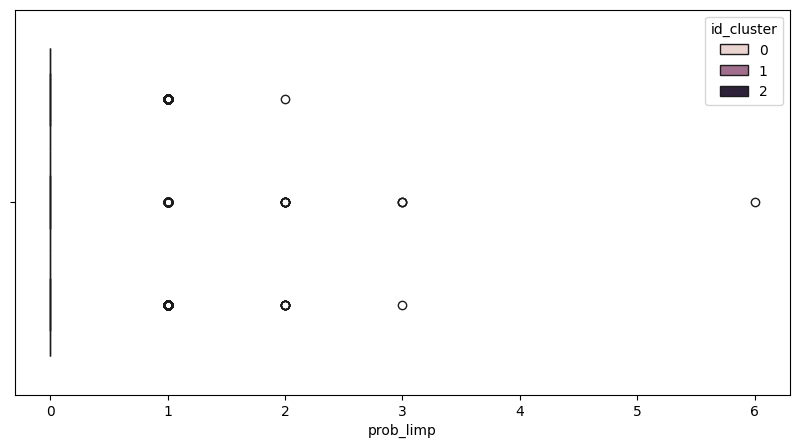

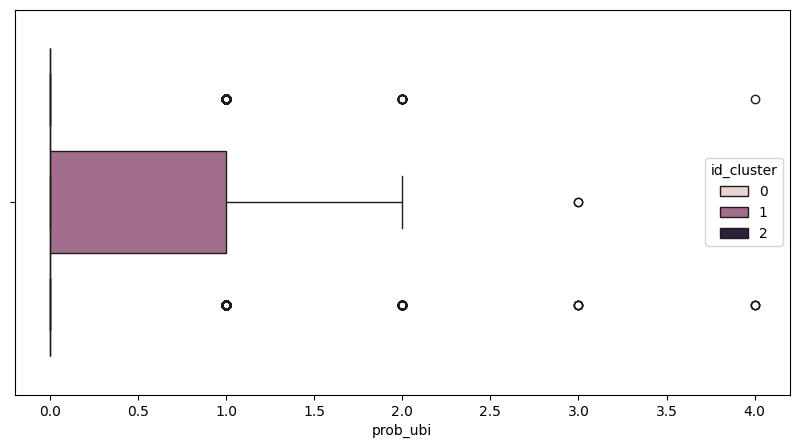

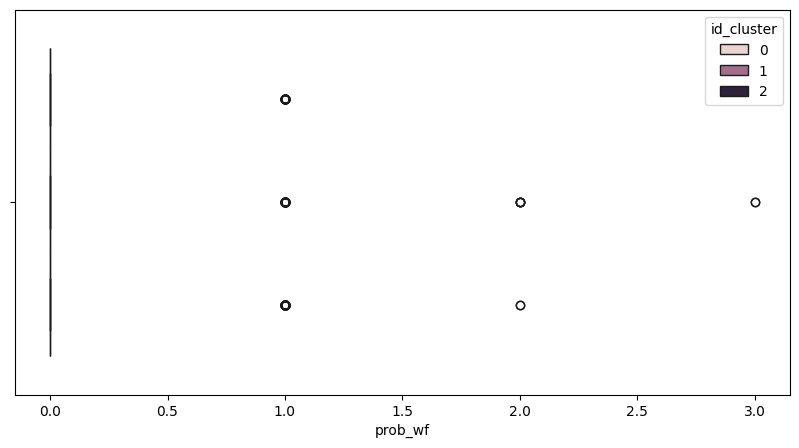

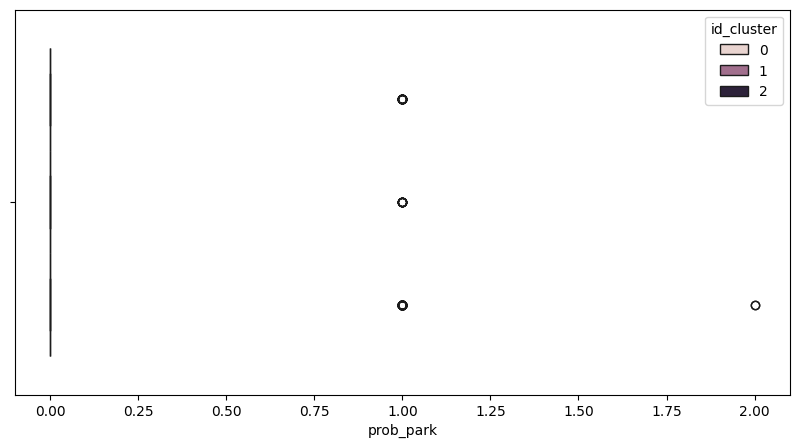

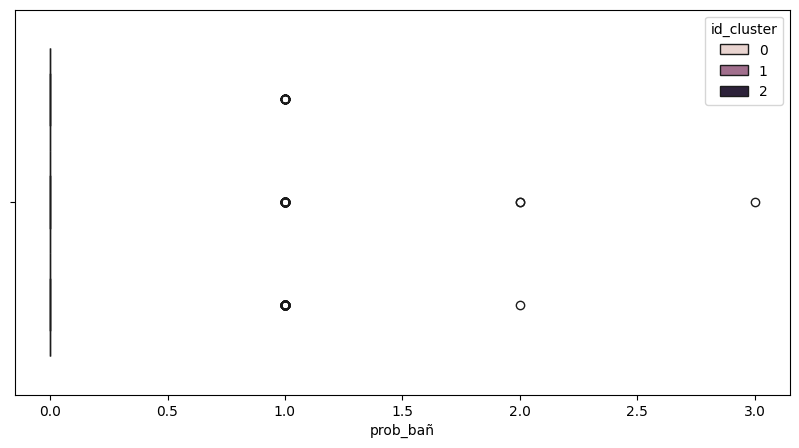

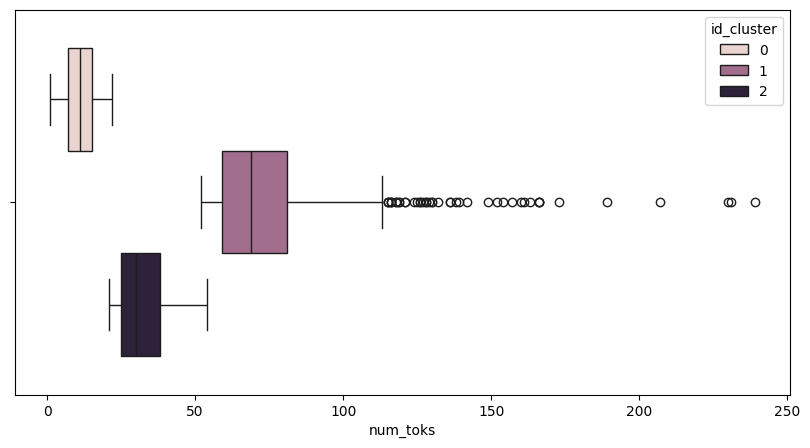

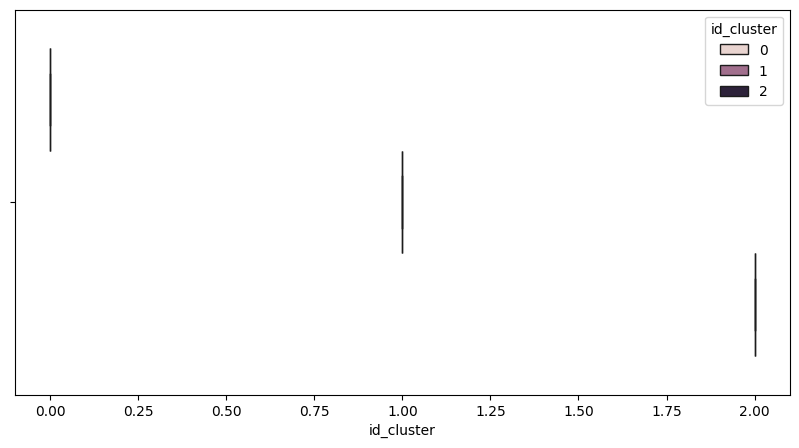

<Axes: xlabel='id_cluster', ylabel='count'>

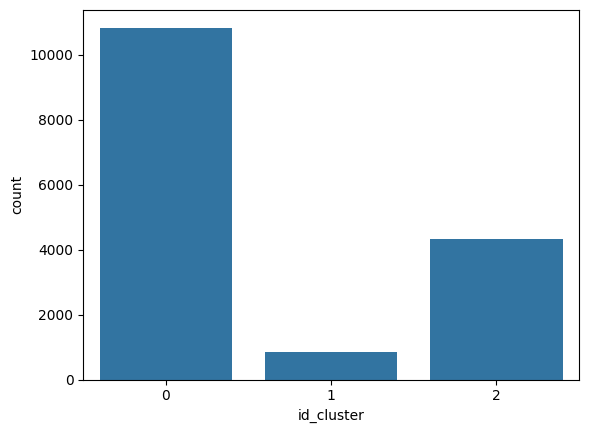

In [18]:
k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_cluster,x=col,hue='id_cluster',ax=ax)
    plt.show()
sns.barplot(data_cluster['id_cluster'].value_counts())

### **Clustering k=4 (Mejor según calinski)**


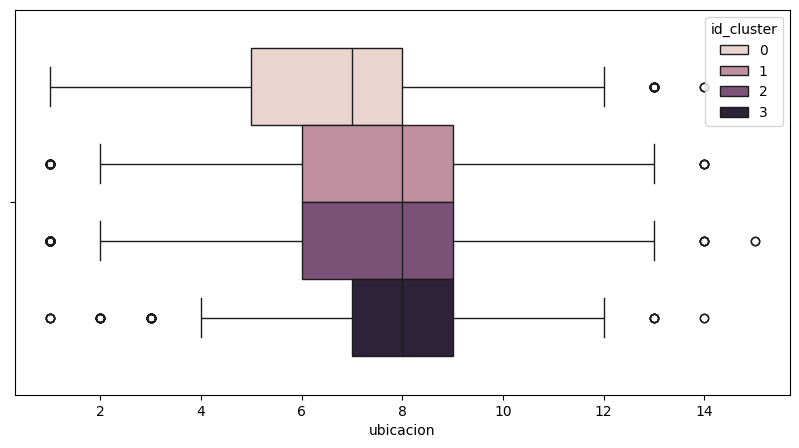

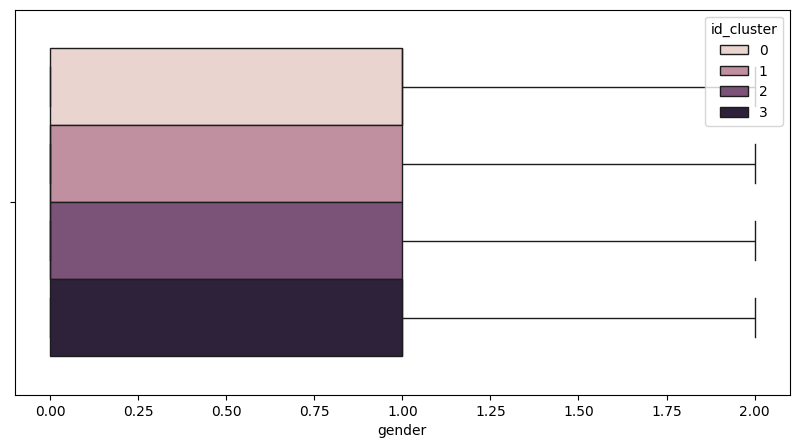

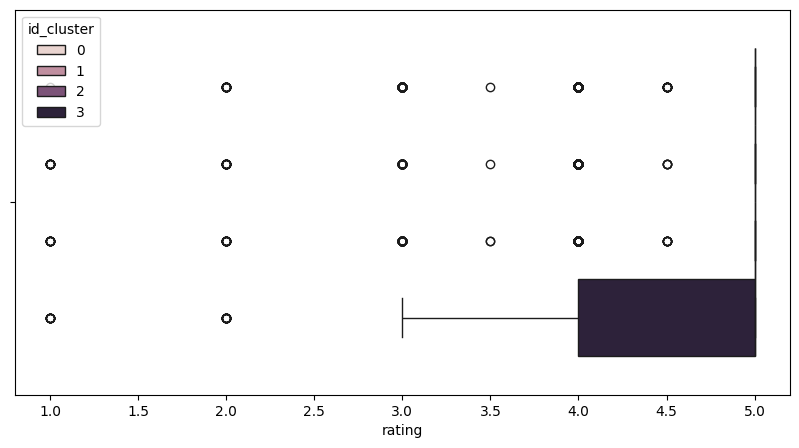

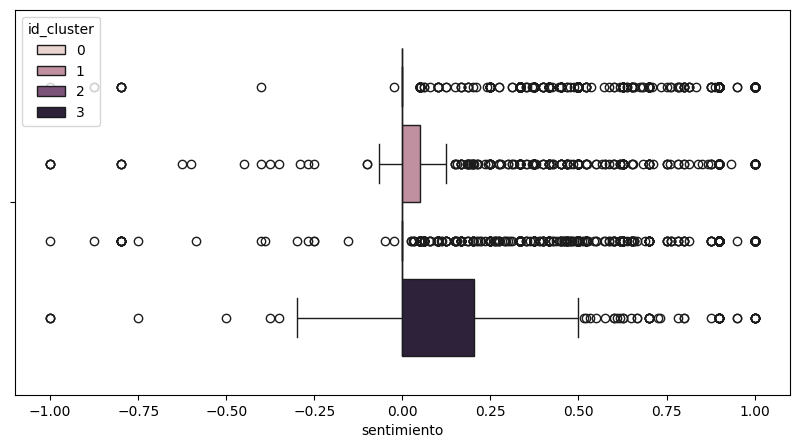

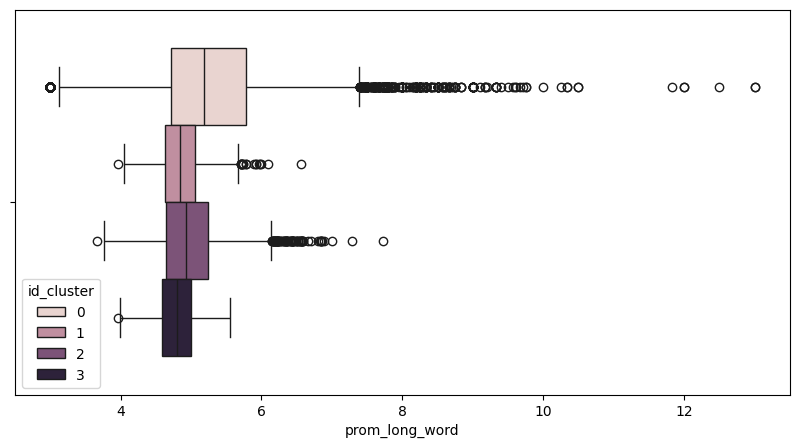

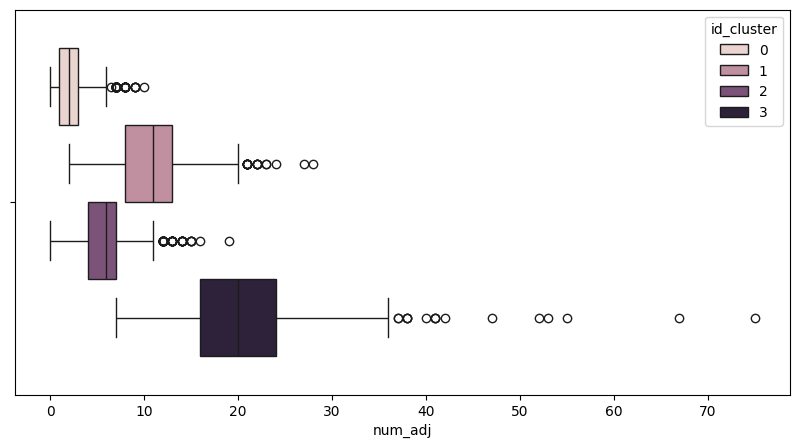

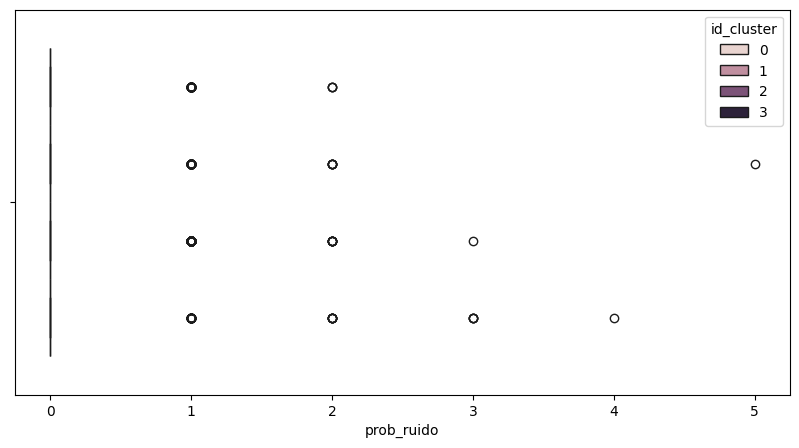

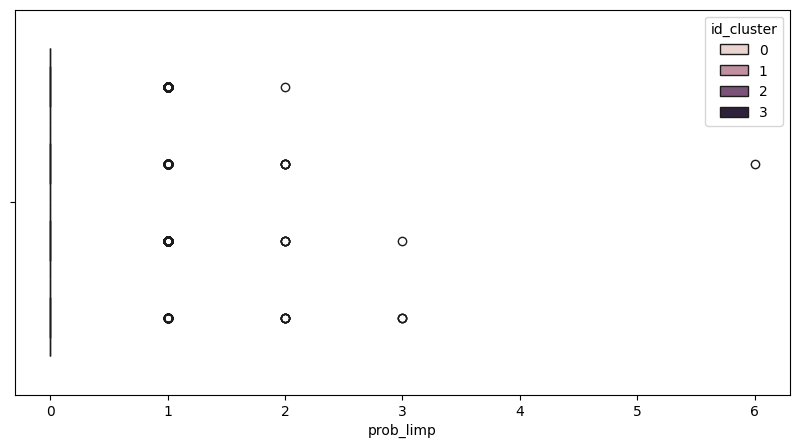

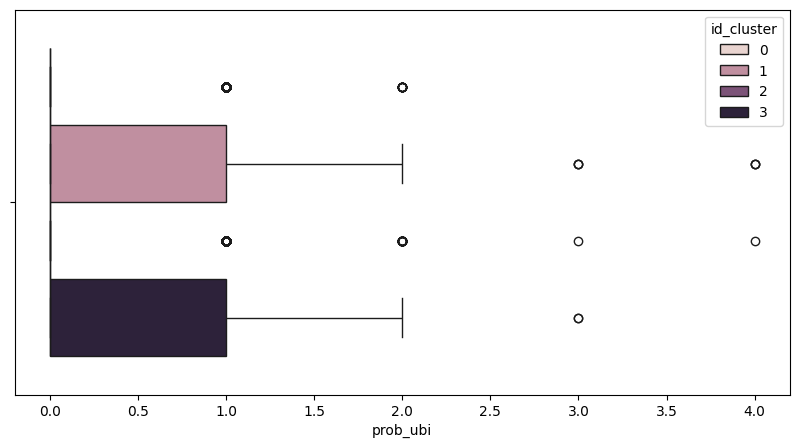

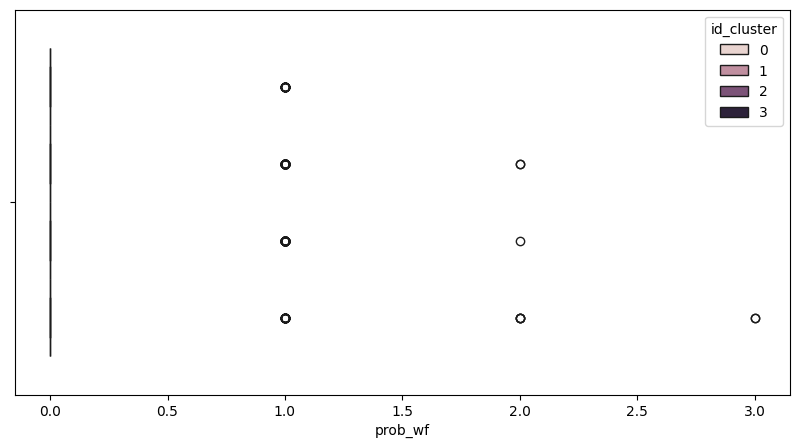

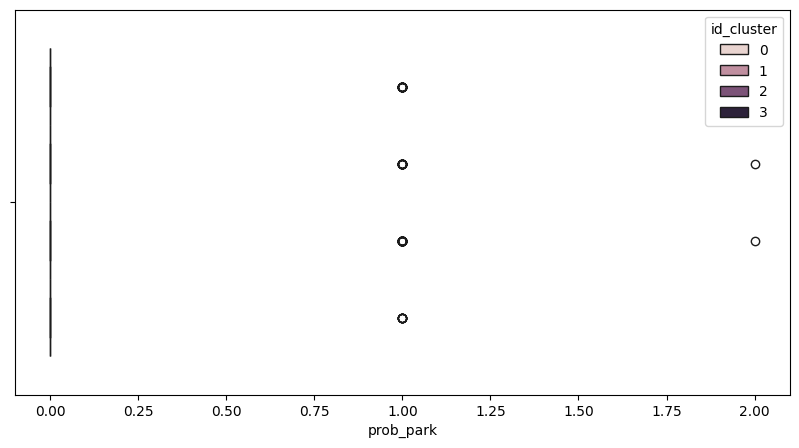

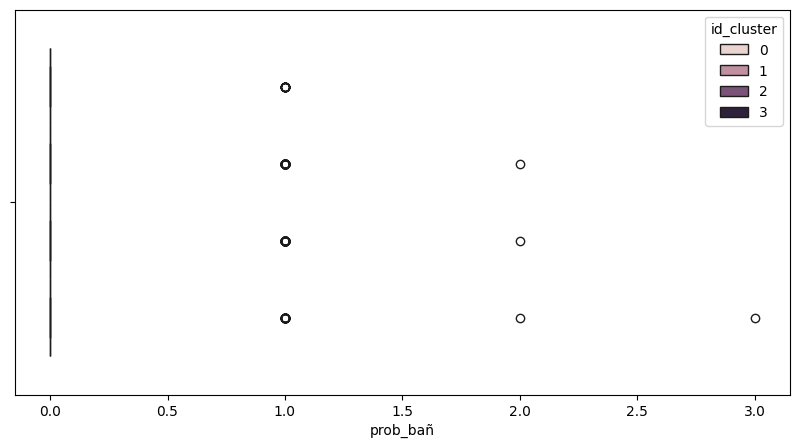

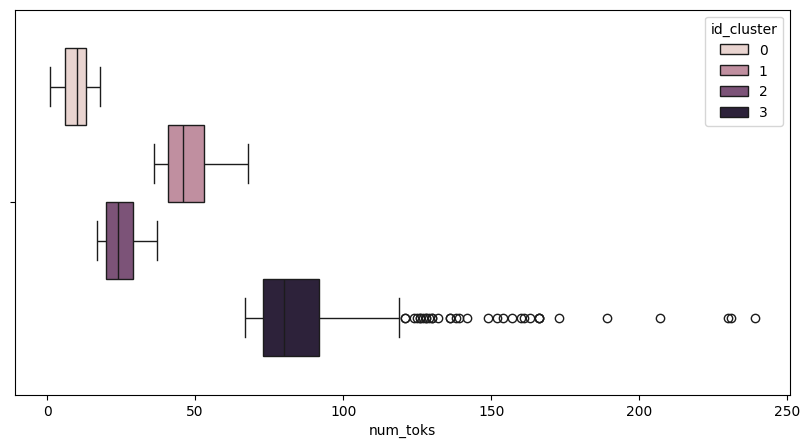

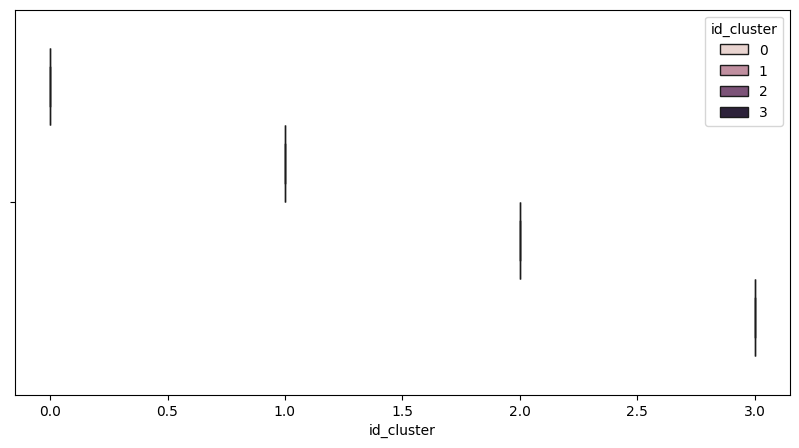

<Axes: xlabel='id_cluster', ylabel='count'>

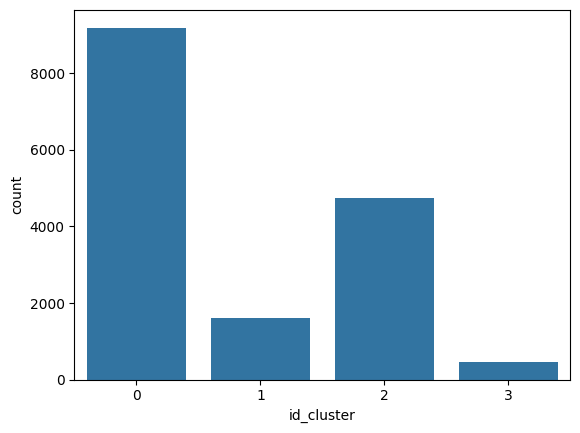

In [20]:
k_val=4
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_cluster,x=col,hue='id_cluster',ax=ax)
    plt.show()
sns.barplot(data_cluster['id_cluster'].value_counts())

# **DBSCAN**
---

In [30]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=20).fit(data_cluster)
labels = db.labels_

# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Número de clusters estimados: {n_clusters_}')
print(f'Número de puntos de ruido: {n_noise_}')

Número de clusters estimados: 10
Número de puntos de ruido: 15707


# **Clustering Jerárquico**
---

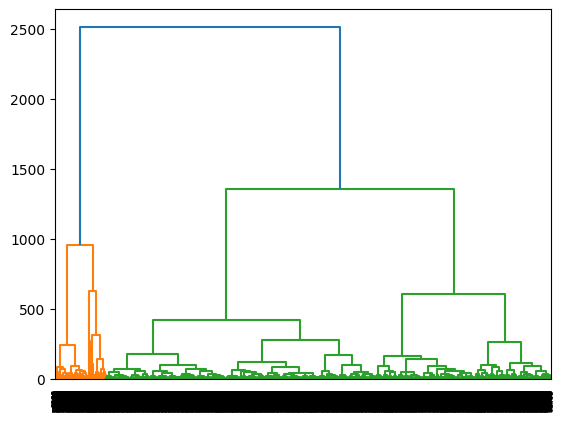

In [31]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

def hierarchical_clustering(X, num_clusters):
    Z = linkage(X, method='ward')
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    return clusters
data_cluster.drop('id_cluster',axis=1,inplace=True)
num_clusters = 3
clusters = hierarchical_clustering(data_cluster, num_clusters=num_clusters)

# Visualización del dendrograma
plt.figure()
dendrogram(linkage(data_cluster, method='ward'))
plt.show()

# **PCA**
---

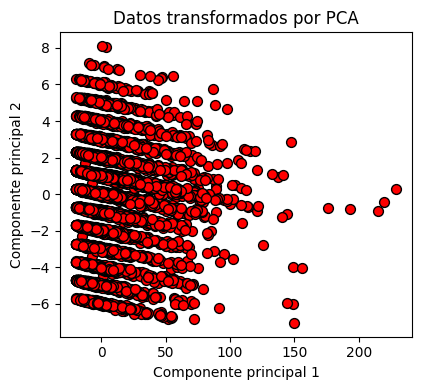

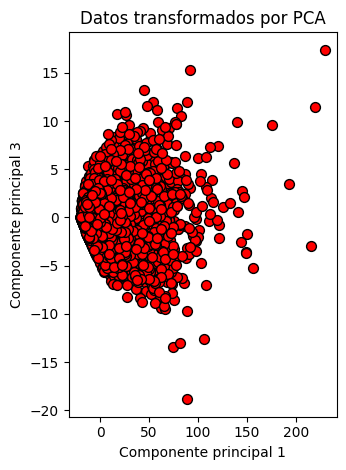

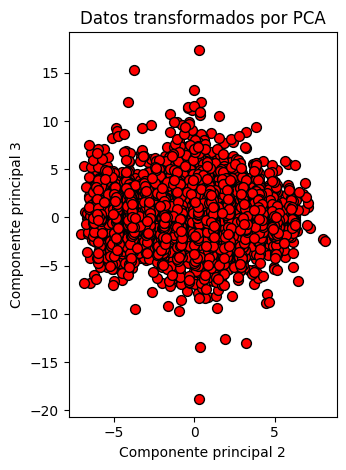

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_cluster)

data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
# Visualización de los datos originales y los datos transformados
plt.figure(figsize=(8, 4))

# Datos transformados por PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', edgecolor='k', s=50)

#PC1-PC2
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.tight_layout()
plt.show()

#PC1-PC3
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 3")
plt.tight_layout()
plt.show()

#PC3-PC2
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 1], X_pca[:, 2], c='red', edgecolor='k', s=50)
plt.title("Datos transformados por PCA")
plt.xlabel("Componente principal 2")
plt.ylabel("Componente principal 3")

plt.tight_layout()
plt.show()

Para k = 2 , CH = 23424.069558986634
Para k = 3 , CH = 26724.82082322121
Para k = 4 , CH = 28636.251233130028
Para k = 5 , CH = 28500.866078540585
Para k = 6 , CH = 31420.845524638065
Para k = 7 , CH = 31678.427281022625
Para k = 8 , CH = 31413.697955265914
Para k = 9 , CH = 31402.748063680483
Para k = 10 , CH = 30216.398907993167


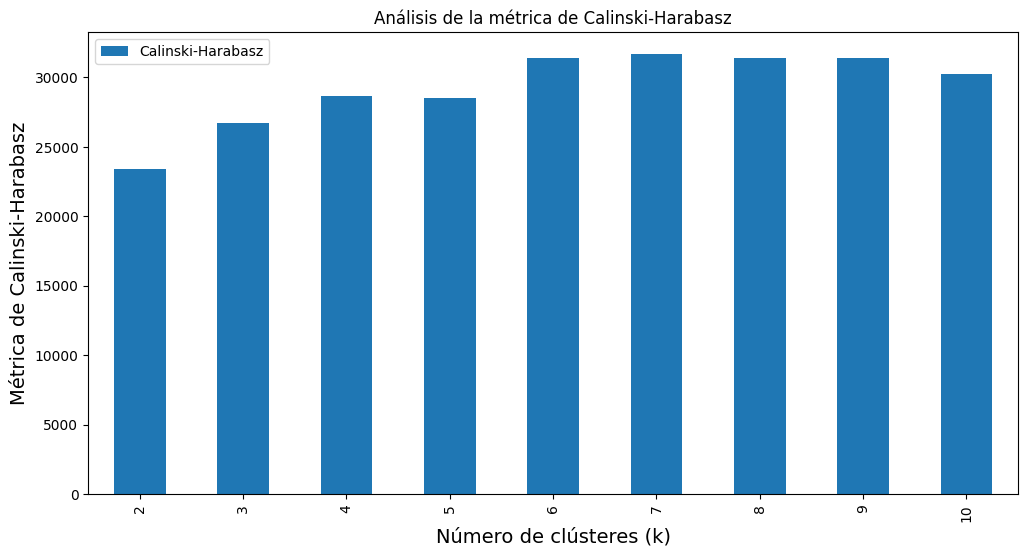

In [36]:
# definimos la n-tupla donde ordenaderemos las sucesivas métricas de Calinski-Harabasz.
# hallados para cada valor de k
Calinski = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para la medida del error de reconstrucción desde k= 2 hasta k= 10 que se
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100)
    Y_pred = kmeans.fit_predict(data_pca)
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(data_pca, Y_pred),
    )
    Calinski.append(calinski_harabasz_score(data_pca, Y_pred))

fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame({'n_clusters': krange,'Calinski-Harabasz': Calinski,}).set_index('n_clusters').plot(title='Análisis de la métrica de Calinski-Harabasz',
kind='bar',ax=ax)
ax.set_ylabel("Métrica de Calinski-Harabasz",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
plt.show()

In [38]:
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
range_n_clusters = [ 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

plt.show()

Para k = 3 , S = 0.5575405326456956
Para k = 4 , S = 0.4892080848888587
Para k = 5 , S = 0.4360183506700383
Para k = 6 , S = 0.42842495191735597
Para k = 7 , S = 0.3833179468947476
Para k = 8 , S = 0.36198721933323014


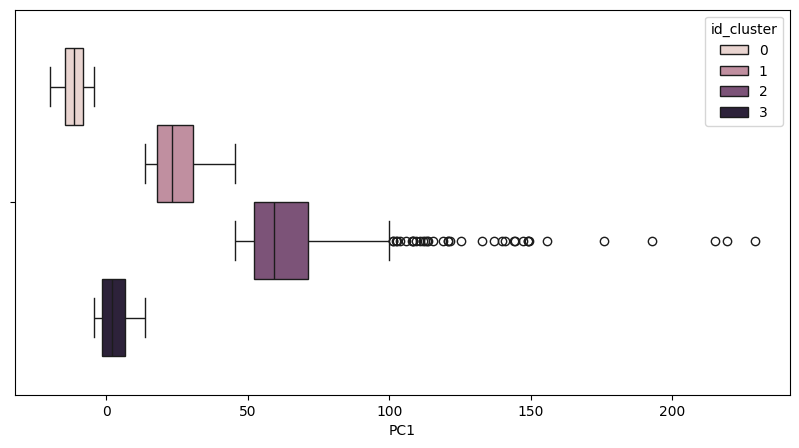

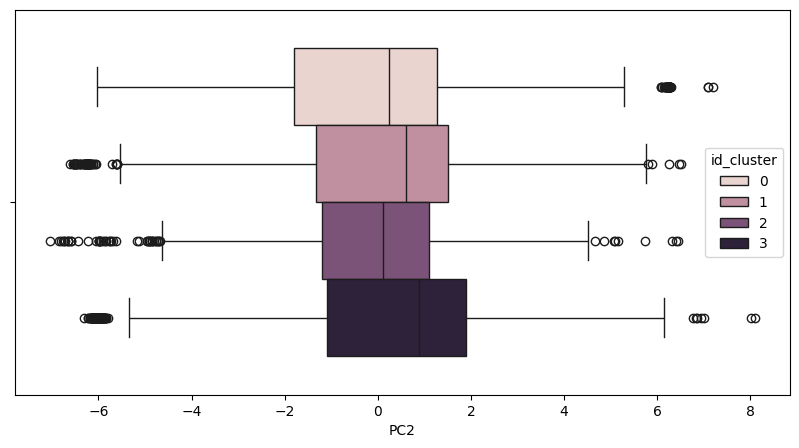

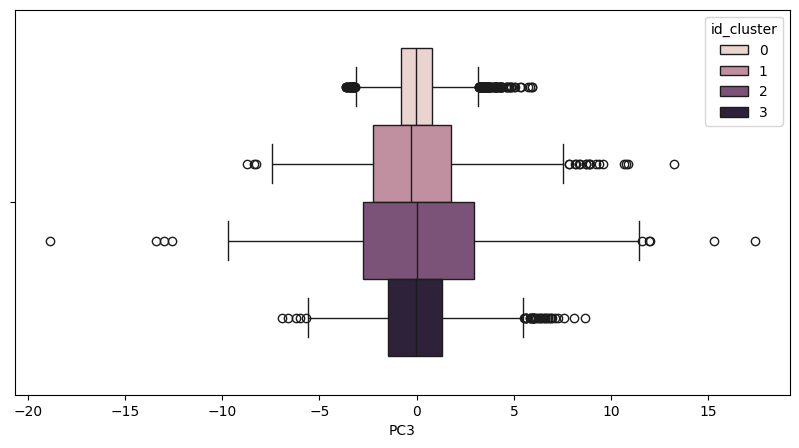

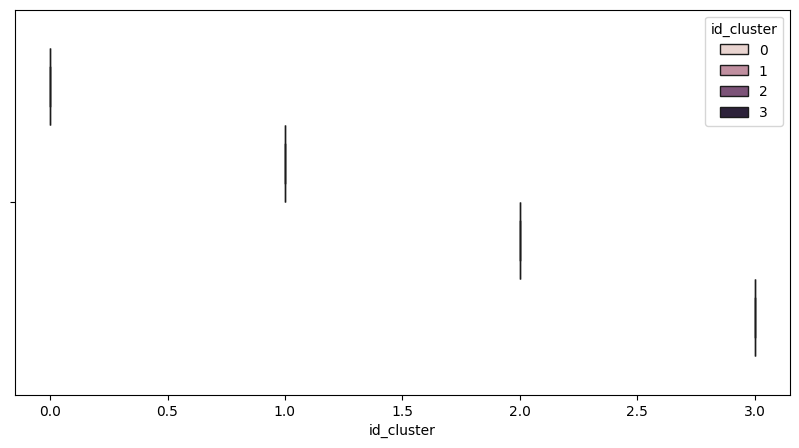

<Axes: xlabel='id_cluster', ylabel='count'>

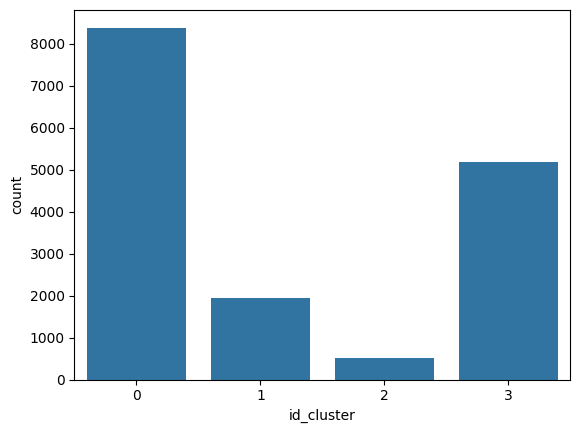

In [39]:
k_val=4
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_pca) # Vector de asignación de etiquetas predichas para cada elemento
data_pca['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_pca.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_pca,x=col,hue='id_cluster',ax=ax)
    plt.show()
sns.barplot(data_pca['id_cluster'].value_counts())